# 住宅価格の回帰
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

* 線形回帰
* SVM
* 決定木
* ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

# データセットの準備
Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

# 回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

## 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、`GrLivArea`と`YearBuilt`の2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。


### 【問題1】解答

In [1]:
import pandas as pd

df= pd.read_csv('../house-prices-advanced-regression-techniques/train.csv')
X = df[['GrLivArea', 'YearBuilt']]
y = df.SalePrice

X.shape

(1460, 2)

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。



### 【問題2】解答

#### データの簡易的な分析

In [2]:
# pd.set_option('display.max_columns', 82)
# pd.set_option('display.max_rows', 50)

In [3]:
X.head(10)

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
5,1362,1993
6,1694,2004
7,2090,1973
8,1774,1931
9,1077,1939


In [4]:
X.describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.distplot(df['SalePrice'])

/Users/FUZZY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


GrLivArea vs SalePrice


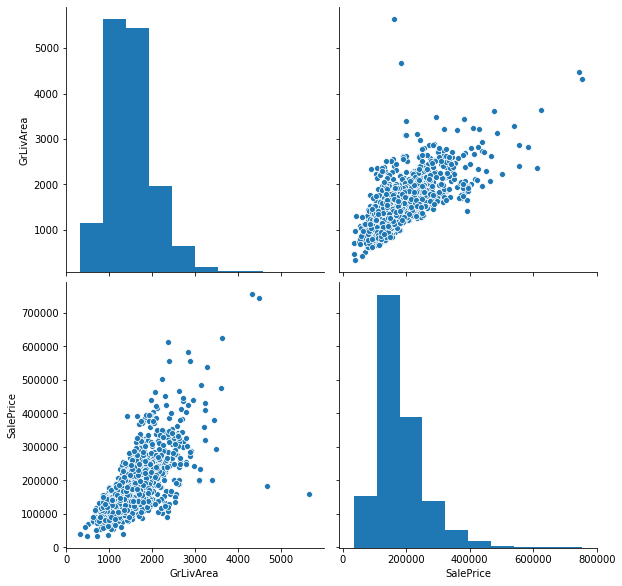

YearBuilt vs SalePrice


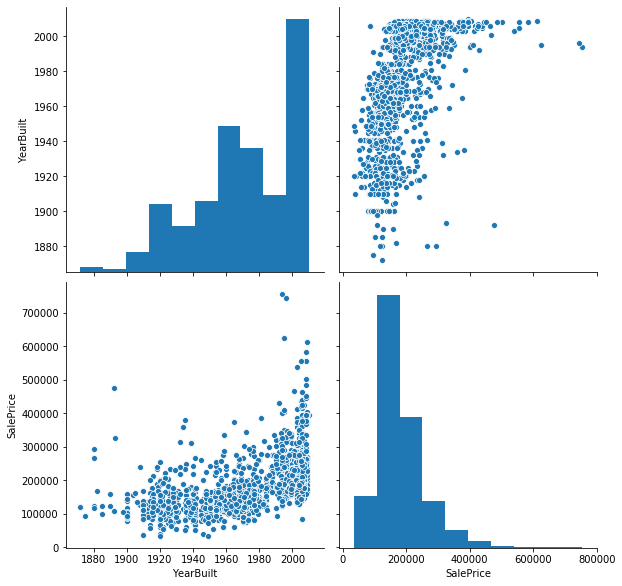

In [7]:
print('GrLivArea vs SalePrice')
sns.pairplot(df[['GrLivArea', "SalePrice"]], height=4, aspect=1,)
plt.show()

print('YearBuilt vs SalePrice')
sns.pairplot(df[['YearBuilt', "SalePrice"]], height=4, aspect=1)
plt.show()

#### データ分割

In [8]:
# import numpy as np
# y = np.log(y)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# ndarrayに変換
X, y = X.values, y.values

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### モデル学習

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### 評価：平均二乗誤差（Mean Squared Error, MSE）

In [11]:
# 平均二乗誤差（Mean Squared Error, MSE）

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

2314465092.732015


#### 可視化

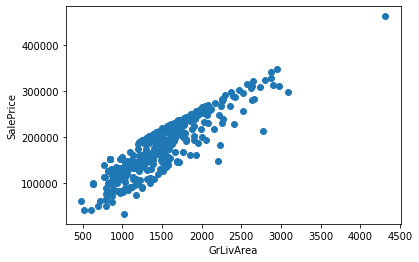

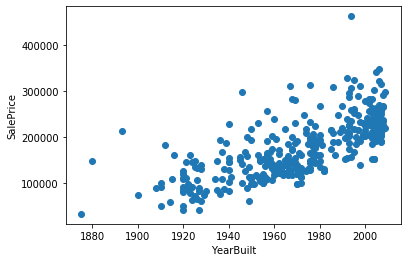

In [12]:
import matplotlib.pyplot as plt

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:,0], y_pred)
plt.show()

plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:,1], y_pred)
plt.show()

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

* 線形回帰
* SVM
* 決定木
* ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

* [sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
* [sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### 【問題3】解答

In [13]:
df= pd.read_csv('../house-prices-advanced-regression-techniques/train.csv')
X = df[['GrLivArea', 'YearBuilt']]
y = df.SalePrice

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

2314465092.732015


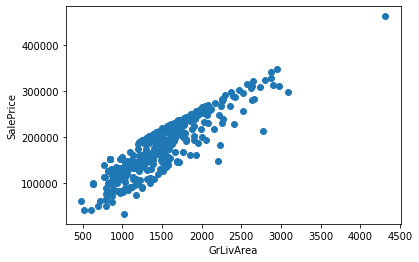

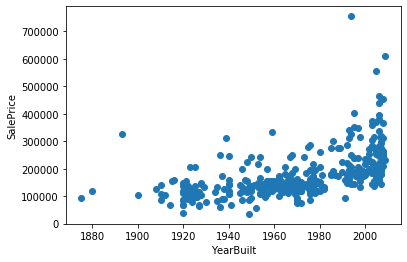

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)

import matplotlib.pyplot as plt

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_pred)
plt.show()

plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test)
plt.show()

7171025750.700425


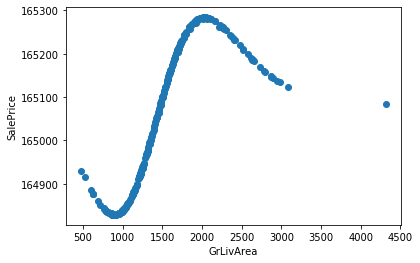

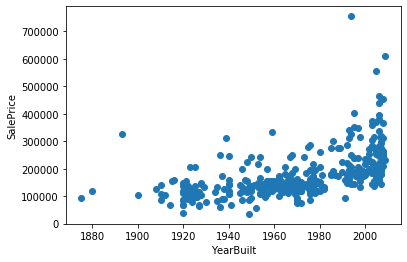

In [15]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
print(mse_svr)

import matplotlib.pyplot as plt

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_pred)
plt.show()

plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test)
plt.show()

2950095480.3013697


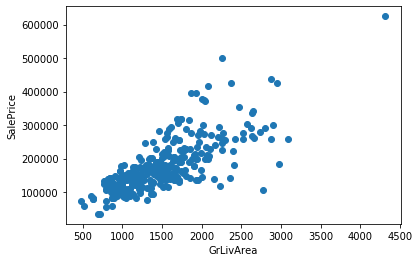

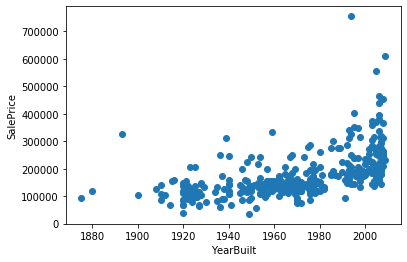

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
mse_dtree = mean_squared_error(y_test, y_pred)
print(mse_dtree)

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_pred)
plt.show()

plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test)
plt.show()

3740238273.019178


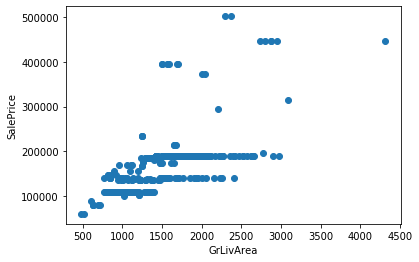

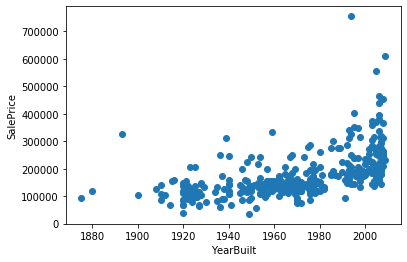

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10, max_depth= 3, random_state= 42)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(mse_rf)

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_pred)
plt.show()

plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test)
plt.show()

In [18]:
mse_list = mse_lr, mse_svr, mse_dtree, mse_rf
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
table = pd.DataFrame([mse_list], columns=model_names)
display(table)

,Linear Regression,SVM,Decision Tree,Random Forest
0,2.314465e+09,7.171026e+09,2.950095e+09,3.740238e+09
